# Pymaceuticals, Inc, Analysis


This report includes:

- A summary of the project

- Research/Statistical methods

- Discussion

- Conclusion

- Recommendations for further investigations

### Summary
Pymaceuticals, Inc. (P-Inc.), a new pharmaceutical company that specializes in anti-cancer medications, is investigating its drug of interest,Capomulin, as a potential treatment for squamous cell carcinoma (SCC), a form of skin cancer. This project analyses data from P-Inc's most recent animal study to compare the performance of Capomulin against 9 other treatment regimens. 

### Methodology
The methodology includes:
- Longitudinal pre-clinical animal study: 249 mice who were identified with SCC tumors (measured in mm3) received treatment with 10 drug regimens. Each mouse's tumor development was observed and measured over a period of 45 days.

- Descriptive statistics: Calculate means, medians, standard deviations (Std. Dev.), and standard error of means (SEM) for the tumor volumes matching each drug regimen.

- Comparative/correlation relationship analysis: Explore the realtionships among drug regimens and final tumor volumes, mouse weight and average tumor volume, and comparisons among the means, medians, SEM and Std. Dev. of tumor volumes.

- Data visualization: Analyses are presented as tables and graphs. 

### Discussion
- Limitations

This report is a preliminary analysis and acknowledges potential limitations, such as sample size, sampling methods, data quality, and other factors which may affect the outcomes of specific drug regimens.

- Summary Statistics

The data was cleaned to remove all duplicated mouse's rows. Capomulin and Ramicane yielded the lowest tumor volume SEMs and Std. Dev. This suggests that, based on this study, the mean tumor volumes of mice treated with Capomulin and Ramicane, are the best estimators of the mean tumor volumes across all 10 drug regimens in the study.Additionally, Ramicane may be a best estimator, since Capomulin's SEM is more than 8 thousandths mm3 greater than Ramicane's as well as Capomulin's Std. Dev. is more than a tenth greater than Ramicane's. 

- Drug Regimen and Observed Mouse Timepoints

Bar graph shows that the most observations were made for Capomulin and Ramicane with both having approximately 50 more observations than any of the 8 other regimens.

- Sex Distribution  

Pie Chart shows more male mice being in the study with 51% of the mice being male and 49% being female.

- Comparing the Distributions of Selected Drug Regimens

A multiple box plot of the distributions of final tumor volumes for the four most promising drug regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) shows:

1. Capomulin and Ramicane have the smallest final tumor volumes of all four distributions.
2.  The largest final tumor volumes shown for Capomulin and Ramicane are around the smallest for the other two regimens.
3. Capomulin has the smallest IQR of final tumor volumes which potentially indicates the best supported median of approximately 41.56mm3. 
4. Ramicane shows the closest distribution to Capomulin, considering all five box plot parameters, but its IQR is larger than Capomulin's, suggesting more spread in its distributions. 
5. Potential outlier for Infubinol: a tumor volume of 36.321346mm3 is shown in red 

- Tumor Volume of a Specific Mouse Treated with Capomulin

A mouse (l509), which was treated with Capomulin, was selected to make a line graph to show tumor volume over the time period. The graph generally trends downwards suggesting that the tumor volume decreased over time with the Capomulin regimen. 
Note: This argument is preliminary and limited to mouse l509. 

- Mouse Weight and Average Tumor Volume

A scatter plot with linear regression of the relationship between mouse weight and average tumor volume yielded a correlation coefficient of 0.84 indicating a very strong positive relationship. It likely means that average tumor volume tends to increase as mouse weight increases. 

### Conclusion
This preliminary analysis suggests that Capomulin compares well to Ramicane as a promising drug regimen in SCC treatment. Further investigations and considerations are encouraged.

### Recommendations for Further Investigations and Considerations
- Conduct hypothesis testing, for example, to determine if the differences in summary statistics between Capomulin and Ramicane are statistically significant. 
- Investigate the reasons for the higher number of observed mouse timepoints, for Capomulin and Ramicane, how this might influence outcomes.  
- Investigate the relationship between mouse sex and the outcomes of drug regimens.
- Explore the relationship between mouse weight and tumor volume in more detail to understand the potential implications.

In [26]:
# Setup Dependencies    
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as st    
import numpy as np  

In [27]:
# Read data from csv files  
mouse_met_data = pd.read_csv("../Resources/Mouse_metadata.csv")  
study_results = pd.read_csv("../Resources/Study_results.csv")  

# Merge the data using the Mouse ID column as the common id  
merge_data = pd.merge(study_results, mouse_met_data, on="Mouse ID", how="left")

# Preview the DataFrame
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Calulate and display the number of mice
num_mice = len(mouse_met_data["Mouse ID"].unique()) 
num_mice

249

In [29]:
# Identify duplicate mice by ID number and Timepoint
dupli_mice = merge_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')

# Filter the duplicate mice data
dupli_mice_data = merge_data[dupli_mice]

# Get the unique list of duplicate mice IDs
dupli_mice_ids = dupli_mice_data['Mouse ID'].unique()
dupli_mice_ids

array(['g989'], dtype=object)

In [30]:
# Generate and show all the rows for the duplicate mouse  
mouse_g989_data = merge_data[merge_data['Mouse ID'] == 'g989']
mouse_g989_data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
clean_merge_data = merge_data[merge_data['Mouse ID'] != 'g989']

# Preview the cleaned data  
clean_merge_data.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
# Calculate and display the number of unique mice in the clean DataFrame
unique_mice_count = len(clean_merge_data['Mouse ID'].unique())
unique_mice_count

248

## Summary Statistics

In [33]:
# Get summary statistics of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen    
summ_stats = clean_merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('Mean', np.mean), ('Median', np.median), ('Variance', np.var),
    ('Std Dev', np.std), ('SEM', st.sem)])

#Format the summary table   
summ_stats.columns = pd.MultiIndex.from_product([["Tumor Volume (mm3)"], summ_stats.columns])

#Display the summary table
summ_stats

Tumor Volume (mm3)                                          
                           Mean     Median   Variance   Std Dev       SEM
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

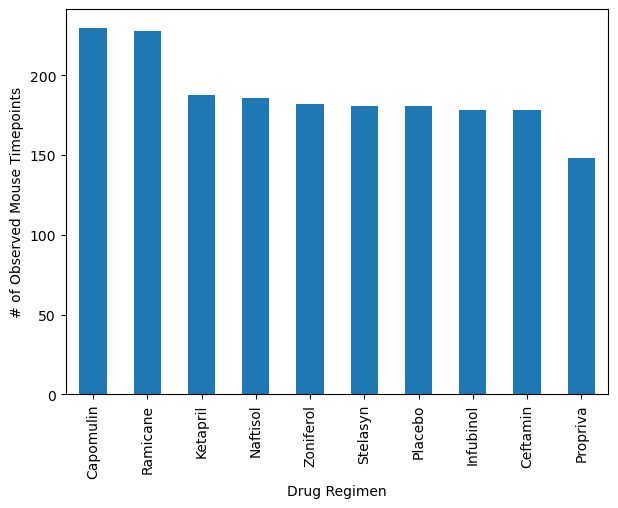

In [34]:
# Use pandas to generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen
rows_by_drug = clean_merge_data['Drug Regimen'].value_counts()

#Create the bar plot and set labels for the axes
ax = rows_by_drug.plot(kind='bar', figsize=(7,5))
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints'); 

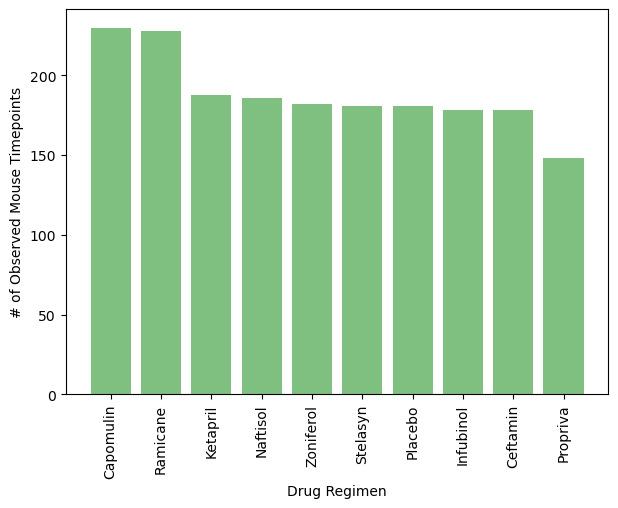

In [35]:
# Use pyplot to generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen
rows_by_drug = clean_merge_data['Drug Regimen'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(7, 5))
plt.bar(rows_by_drug.index.values, rows_by_drug.values, color='g', alpha=0.5, align='center')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

# Display the plot
plt.show()

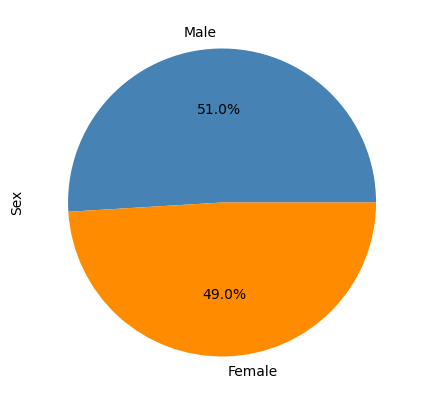

In [36]:
# Use pandas to generate a pie chart showing the distribution of females vs male mice
mice_gend = clean_merge_data["Sex"] .value_counts() 

# Create the pie chart with custom formatting   
ax = mice_gend.plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', startangle=360, colors=['steelblue', 'darkorange'])
ax.set_ylabel('Sex'); 

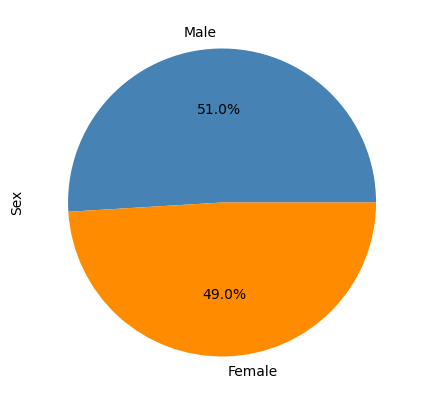

In [37]:
# Use pyplot to generate a pie chart showing the distribution of females vs male mice
mice_gend = clean_merge_data['Sex'].value_counts()

# Create the pie chart with custom formatting   
plt.figure(figsize=(5, 5)) 
plt.ylabel('Sex')
plt.pie(mice_gend, labels=mice_gend.index, autopct='%1.1f%%', startangle=360, colors=['steelblue', 'darkorange'])

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Get the last (greatest) timepoint for each mouse
last_timepnts = clean_merge_data.groupby('Mouse ID')['Timepoint'].max()

# Merge with the original DataFrame to get the tumor volume at the last timepoint
final_tumr_vol = pd.merge(clean_merge_data, last_timepnts, on=['Mouse ID', 'Timepoint'])

# Filter for the specific treatment regimens
treatmnt_regs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumr_vol = final_tumr_vol[final_tumr_vol['Drug Regimen'].isin(treatmnt_regs)]

final_tumr_vol.reset_index(drop=True, inplace=True)

final_tumr_vol.head ()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25


In [39]:
# List of drugs to include in the box plot
drugs_to_plot = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data to include only the final tumor volume for each mouse in the specified drugs
final_tumor_vol_data = clean_merge_data[clean_merge_data['Drug Regimen'].isin(drugs_to_plot)].groupby(['Mouse ID', 
'Drug Regimen'])['Tumor Volume (mm3)'].last().reset_index()

# Create a dictionary to store the tumor volume data for each treatment group
tumor_vol_data = {}

# Iterate through each drug in drugs_to_plot and store the tumor volume data
for drug in drugs_to_plot:
    tumor_vol_data[drug] = final_tumor_vol_data[final_tumor_vol_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']

# Create a list to store the potential outliers for each treatment group
potential_outliers = []

# Calculate the box plot parameters and potential outliers for each treatment group
for drug in drugs_to_plot:
    quartiles = np.percentile(tumor_vol_data[drug], [25, 75], interpolation='midpoint')
    q1 = quartiles[0]
    q3 = quartiles[1]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = tumor_vol_data[drug][(tumor_vol_data[drug] < lower_bound) | (tumor_vol_data[drug] > upper_bound)]
    potential_outliers.append(outliers)

# Print the results for each treatment
for i, drug in enumerate(drugs_to_plot):
    print(f"{drug}'s potential outliers: {potential_outliers[i]}\n")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



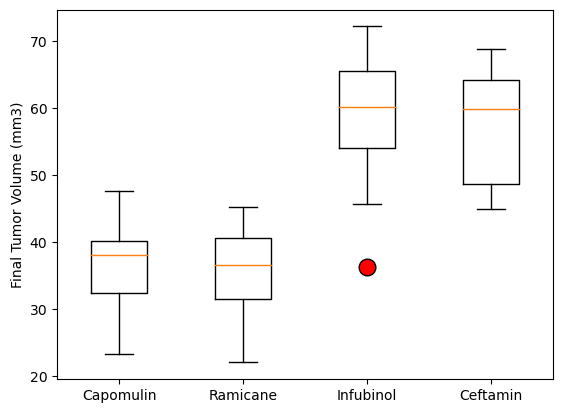

In [40]:
# Box plot parameters are already calculated in the previous section
# Generate the box plot with outliers highlighted in red
plt.boxplot([tumor_vol_data[drug] for drug in drugs_to_plot], labels=drugs_to_plot, flierprops=dict(marker='o', markerfacecolor='red', markersize=12))

# Add labels and title')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

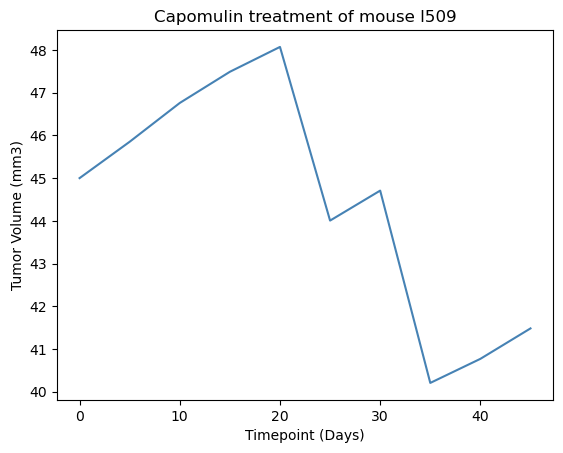

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose the mouse ID
mouse_id = "l509"

# Filter the data for the selected mouse treated with Capomulin
capomulin_data = clean_merge_data[(clean_merge_data['Drug Regimen'] == 'Capomulin') & (clean_merge_data['Mouse ID'] == mouse_id)]

# Generate the line plot
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], color='steelblue')

# Add labels and title
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}') 

# Show the plot
plt.show()

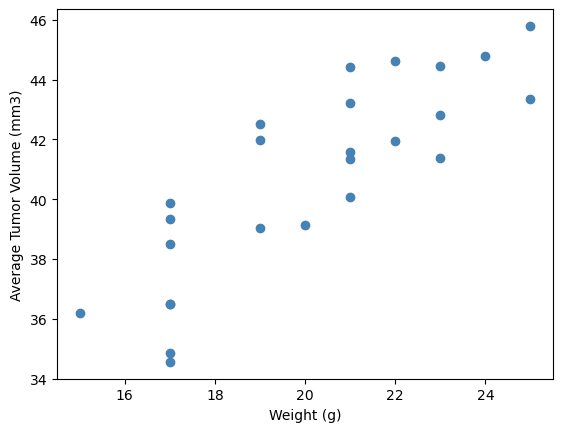

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin treatment
capomulin_data = clean_merge_data[clean_merge_data['Drug Regimen'] == 'Capomulin']

# Group the data by mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='steelblue')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

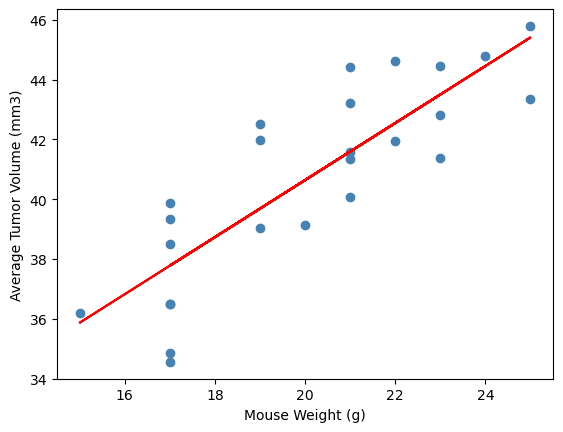

The Correlation between mouse weight and the average tumor volume is 0.84


In [43]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Capomulin and average tumor volume data were already calculated in the previous section   

# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(mouse_weight, average_tumor_volume)

# Perform linear regression
slope, intercept, r_value, p_value, _ = st.linregress(mouse_weight, average_tumor_volume)

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='steelblue')

# Add the regression line to the plot
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='r', label=f'y = {slope:.2f}x + {intercept:.2f}')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

# Print the correlation coefficient
print(f'The Correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}')